In [1]:
# Program to connect to the tweeter api and collect tweets
# related to AI. For the sake of this experiment 
import tweepy as tw

# Important tweeter tokens for auth
consumer_key= 'rtOHXdgu2S8SIFctVfF0yhXcY'
consumer_secret= 'l8E5AIArXxZvr2idFTCzoLDkjqssLVIeo3TaUSyObqH0tQ7KsE'
access_token= '185329008-rIYt3Y8HBkgBVSdYcy6iTMkXiUXFF3cSJkjuCZU6'
access_token_secret= 'qKIz3VOjOus4mvNNg0JYGbaMHncPgLqajhUxJfiUBTHbL'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [30]:
# Collect tweets
search_words = ['#ai', '#artificial intelligence', '#artificialintelligence']
date_since = '2020-11-16'

# Since we are purely using this to evaluate the nltk/textblob 
# for sentiment analysis let's use a sample set of 100
sample_tweets = 200
tweets = []

for search_word in search_words:
    _tweet_obj = tw.Cursor(api.search,
                           q=search_word,
                           lang="en",
                           since=date_since, tweet_mode='extended').items(sample_tweets)
    for tweet in _tweet_obj:
        # When using the extended tweet_mode, the object attr changes to
        # full_text
        tweets.append(tweet.full_text)
    break
        
print(tweets)

['The latest The Hacking Daily! https://t.co/FPUOLfy5le Thanks to @Lemmiwinks_III @KatiWeis #ai #machinelearning', '5 Ways Augmented Reality Apps Are Transforming Our Everyday Lives https://t.co/kqrjmhxpWB #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/75g99USLUl', 'RT @EasternStyle1: A robot out of control.#Programming #IoT #AI #100DaysOfCode #MachineLearning #ML #Airdrop #Python #CloudComputing #Analy…', 'RT @Everyday_MBA: [podcast] Leon Kuperman discusses AI-driven cloud optimization and how organizations can reduce their cloud spending w #A…', 'RT @spxbot: The current wave viewed by r.Virgeel  #artificialintelligence #ai #spx #sp500 a.i. for investors and traders https://t.co/3DobV…', 'RT @mvollmer1: A simulated video 🎥 of eye 👁 movements via @EasternStyle1 \n\n#Programming #AI #100DaysOfCode #MachineLearning #ML #Python #An…', 'RT @DarrabEducation: 

In [31]:
print(len(tweets))

200


In [32]:
# First, let's use NLTK's sentiment-analysis across
# collected tweets
import pandas as pd
import nltk
import re
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df = pd.DataFrame(columns=['Tweet', 'Sentiment'])
                           
for tweet in tweets:
    # Remove tweets with urls
    if 'https' in tweet:
        continue
    # Substitute retweet data
    tweet = re.sub('RT \@.*: ', '', tweet, 1)
    if (df['Tweet'] == tweet).any():
        continue
    print(tweet)
    score = sia.polarity_scores(tweet)['compound']
    if score < 0:
        sentiment = 'Negative'
    elif score == 0:
        sentiment = 'Neutral'
    elif score > 0:
        sentiment = 'Positive'
    # Finally, add the row to the data-frame
    df = df.append({'Tweet': tweet, 'Sentiment': sentiment}, ignore_index=True)

df.head()

A robot out of control.#Programming #IoT #AI #100DaysOfCode #MachineLearning #ML #Airdrop #Python #CloudComputing #Analy…
[podcast] Leon Kuperman discusses AI-driven cloud optimization and how organizations can reduce their cloud spending w #A…
A simulated video 🎥 of eye 👁 movements via @EasternStyle1 

#Programming #AI #100DaysOfCode #MachineLearning #ML #Python #An…
TechGirls Leadership Program in the #USA 
Coverage: Fully Funded
Levels: Bachelors 
Nationality: All
Deadline 15.01.20…
Deep Vision #01053

#DeepVision #DeepVisionAI #CNFT #CNFTs #Cardano #CardanoCommunity #NFT #NFTs #NFTArt #AI #ArtificialInte…
Researchers describe how specific facial features distinguish a child's face from an adult's face. The findings may he…
Through digital transformation enabled by artificial intelligence (AI), Healthcare companies can tap into underutilize…
Greetings from @SpaceTechExpoEU! Thank you all space guys for your interest in our solutions and your attendance at the panel…
What is natural 

,Tweet,Sentiment
0,A robot out of control.#Programming #IoT #AI #...,Neutral
1,[podcast] Leon Kuperman discusses AI-driven cl...,Positive
2,A simulated video 🎥 of eye 👁 movements via @Ea...,Neutral
3,TechGirls Leadership Program in the #USA \nCov...,Neutral
4,Deep Vision #01053\n\n#DeepVision #DeepVisionA...,Positive


In [27]:
df.to_csv('ai_tweets.csv', index=False)

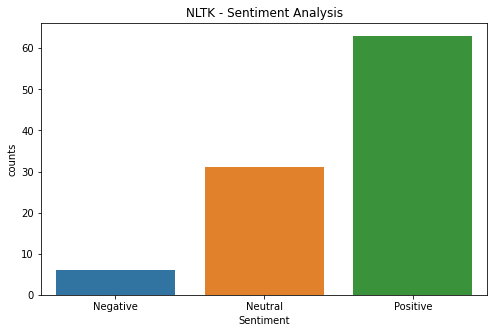

In [19]:
# Let's do a simple plot of sentiment derived by 
# this method
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_graph(title, label_groups):
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x="Sentiment", y="counts", data=label_groups)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(label="%s" %title)
    plt.show()


_labels = df.groupby('Sentiment').size().reset_index(name='counts')
plot_bar_graph('NLTK - Sentiment Analysis', _labels)

In [24]:
# Let's repeat this with textblob
from textblob import TextBlob

df_textblob = pd.DataFrame(columns=['Tweet', 'Sentiment'])

for tweet in tweets:
    score = TextBlob(tweet).sentiment.polarity
    if score < 0:
        sentiment = 'Negative'
    elif score == 0:
        sentiment = 'Neutral'
    elif score > 0:
        sentiment = 'Positive'
    df_textblob = df_textblob.append({'Tweet': tweet, 'Sentiment': sentiment}, ignore_index=True)

df_textblob.head()

,Tweet,Sentiment
0,"RT @TeslaAIBot: Humans,\nIs it better for #AI ...",Positive
1,RT @JobPreference: NEED a JOB?\nSign up now ht...,Positive
2,RT @JobPreference: NEED a JOB?\nSign up now ht...,Positive
3,RT @JobPreference: NEED a JOB?\nSign up now ht...,Positive
4,RT @IGCcentrioles: Using #AI to predict drug i...,Positive


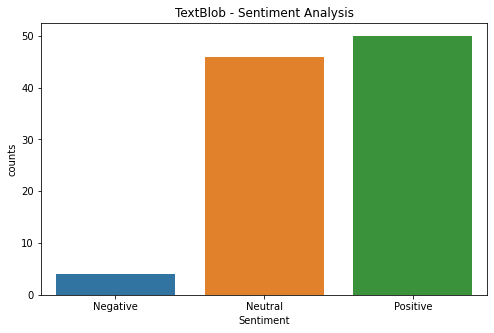

In [26]:
_labels = df_textblob.groupby('Sentiment').size().reset_index(name='counts')
plot_bar_graph('TextBlob - Sentiment Analysis', _labels)